In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [46]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

In [ ]:
# generamos datos aleatorios para poder hacer el ejercicio

In [47]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])   # esto describe una normal en torno al punto 10, con una desviación típica de 3 en horizontal y 4 en vertical
a

array([[ 9.21188389, -0.15188589],
       [ 8.88937431, -0.33937464],
       [10.76840064,  2.95244645],
       [ 8.24213268,  1.29094802],
       [ 5.7967009 , -5.83776714],
       [ 6.3499309 ,  0.63959515],
       [ 8.1057123 , -0.45887277],
       [ 8.72084884, -4.40444487],
       [ 8.83500513, -0.3916611 ],
       [10.4006121 ,  2.71240817],
       [11.95503402,  1.98602715],
       [ 8.5014185 ,  0.50349583],
       [ 9.2335919 ,  1.30693205],
       [12.27768001,  1.62763958],
       [10.95901841, -0.12752032],
       [ 8.72437412, -0.73101911],
       [ 9.64949127,  3.4198941 ],
       [11.49912084, -0.55113172],
       [11.48256428, -0.28623494],
       [ 8.58740424,  1.66814229],
       [11.95570427, -1.27350693],
       [ 9.85622312,  1.08989137],
       [10.11831014,  1.08458295],
       [ 7.76042253,  0.63746835],
       [10.99794159, -2.93746848],
       [ 6.90850201, -1.44867941],
       [ 7.85787065, -0.99148119],
       [ 6.12508463, -2.44306477],
       [10.61143795,

In [48]:
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
b

array([[ 7.99342857e-01,  1.92876207e+01],
       [-8.43364875e-01,  1.91476830e+01],
       [ 2.68289165e+00,  2.02823170e+01],
       [-1.92578090e+00,  1.62811628e+01],
       [ 6.69331318e-02,  2.31307104e+01],
       [ 1.42543381e+00,  2.05758420e+01],
       [ 8.90643314e-01,  2.08505943e+01],
       [ 4.69979905e-01,  1.94569153e+01],
       [ 6.41469296e-01,  2.18940911e+01],
       [ 8.30477213e-01,  1.73591976e+01],
       [-1.87230604e-01,  1.88818653e+01],
       [-2.84504245e+00,  1.83016817e+01],
       [-7.86517974e-02,  2.15077081e+01],
       [ 6.28283345e-01,  1.74578720e+01],
       [ 2.02317907e+00,  2.24478654e+01],
       [ 5.07749238e-01,  1.93412550e+01],
       [-1.55473539e+00,  1.96958473e+01],
       [-2.54958029e+00,  2.00123239e+01],
       [ 2.62102331e-01,  2.21645467e+01],
       [ 1.43291481e+00,  1.74862221e+01],
       [ 4.70848918e-01,  2.40845721e+01],
       [ 1.47294516e+00,  2.16366663e+01],
       [-2.01973160e+00,  1.70863048e+01],
       [ 3.

(150, 2)


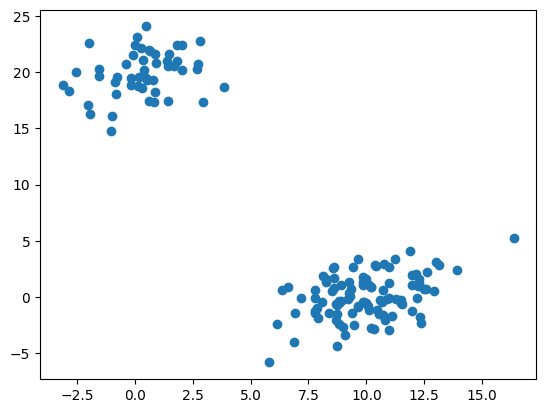

In [49]:
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [50]:
Z = linkage(X,"ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [ ]:
# ojo, hay que comprobar el coef. de correlacion cofenético con la función cophenet. Compara las distancias 2 a 2. Cuanto más cercano sea el valor a 1, mejor será el clustering, ya que significa que habrá preservado las distancias originales

In [51]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [52]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [ ]:
# da un coef. de correlación cofenetico alto (98%)

In [53]:
Z
# observamos que esta matriz nos dice qué puntos ha unido, a qué distancia estaban, y cuántos puntos ha unido. Ej, el primero dice que ha unido el 52 con el 53, que estaban a una distancia de 0.0415, y han sido 2 numeros los que ha unido.
# Si avanzamos, nos damos cuenta que la Z tiene valores que indican que tenemos más de los 150 puntos que teníamos al ppio. Los ha ido generando igual que lo hicimos nosotros en el anterior notebook
# en concreto, en la fila 14, nos encontramos con los puntos 62 y 152. El 152 es nuevo, si queremos saber qué puntos ha conformado el 152 hacemos lo siguiente:

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [54]:
Z[152-len(X)] # aquí vemos que ha unido los puntos 33 y 68 para conformar el 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [55]:
# es decir, ha unido el 33, el 62 y el 68 porque serán números con valores similares.
# lo comprobamos:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

In [56]:
# vemos otro:
print(Z[158-len(X)])#cluster 158

[15.         69.          0.11428971  2.        ]


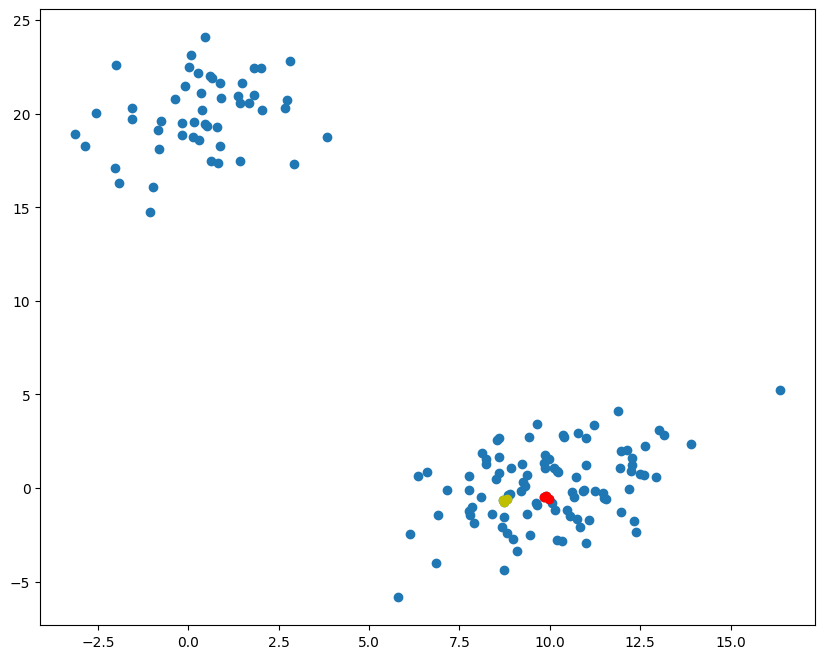

In [57]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()


### Representación gráfica de un dendrograma

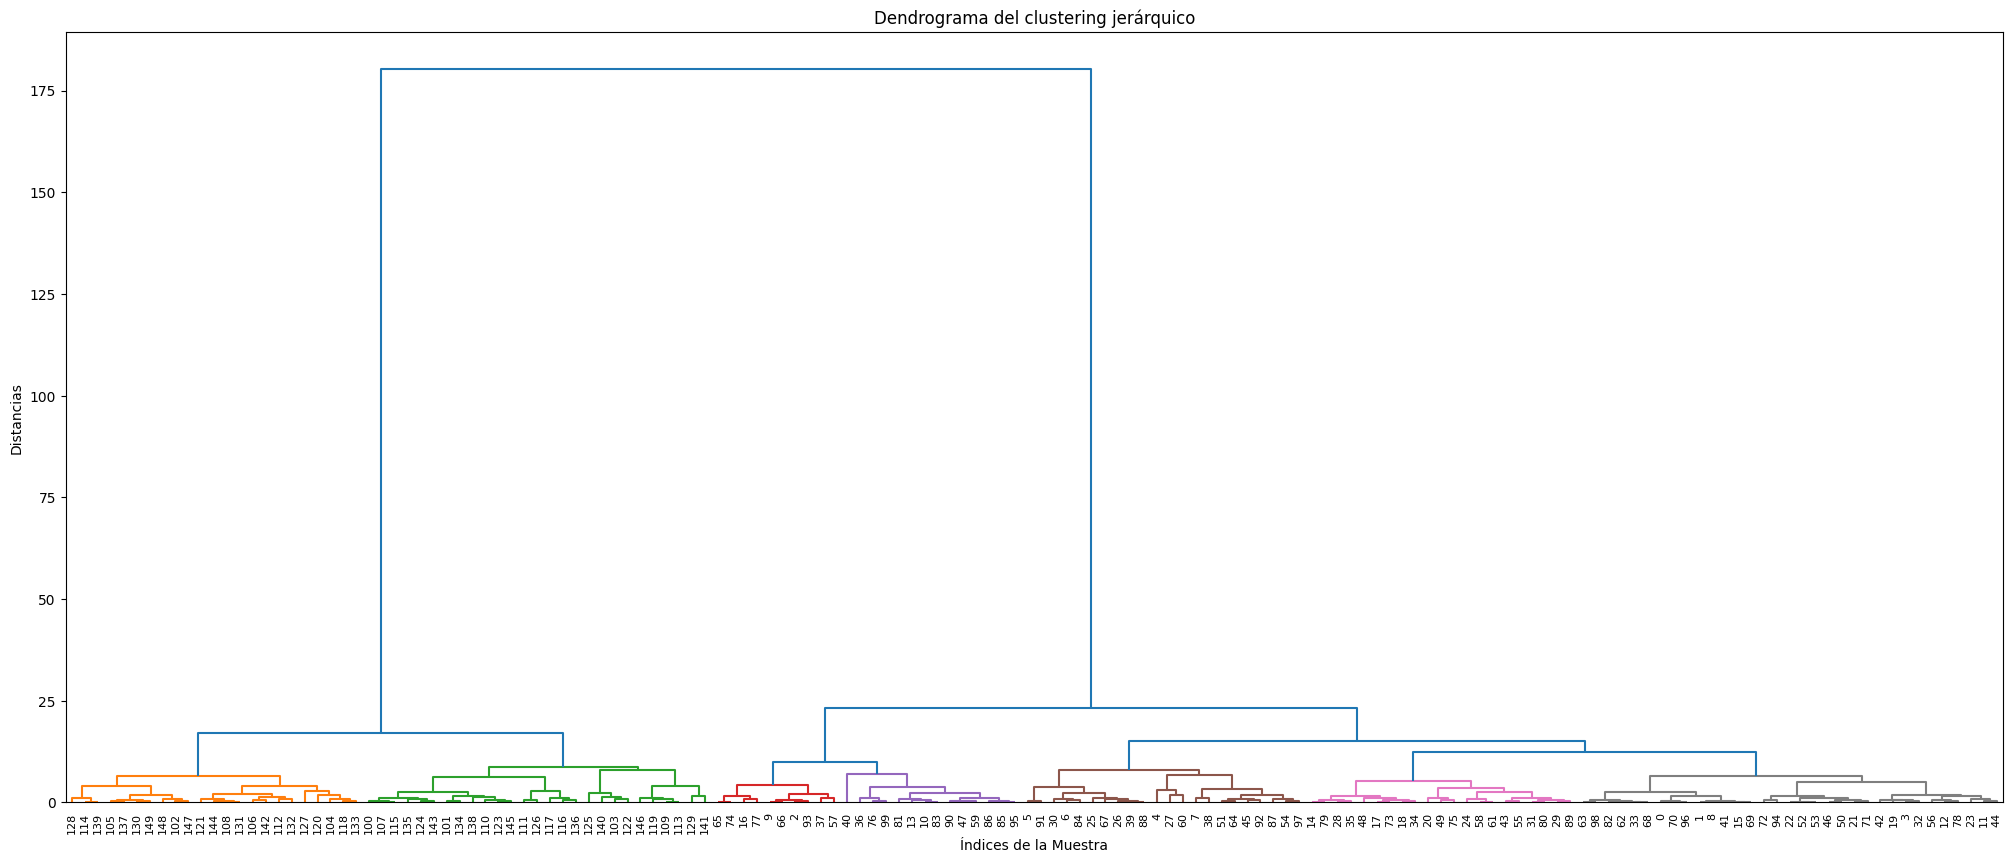

In [58]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.05*180)  # el color_threshold se puede no poner. lo ponemos para darle distinto color a cada cluster. por defecto el programa usa un 0.7 (70% de la distancia total), en este caso ponemos un porcentaje del 180 (que es la distancia máxima en este caso) para ver más clusters separados por colores
plt.show()

In [59]:
# vemos los últimos 4. vemos que el último se separa 183 puntos.
# observamos que, al haber tanta distancia, no deberíamos unirlos. De hecho, podríamos quedarnos con los 50ptos de la parte izquierda por separado de los 100 de la derecha

Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

In [ ]:
# en este caso tenemos 150 datos, en la vida real podríamos llegar a tener muchos más, y nos llevaría mucho tiempo sacar algo en claro del dendrograma. Para ello, haremos lo siguiente:

### Truncar el dendrograma

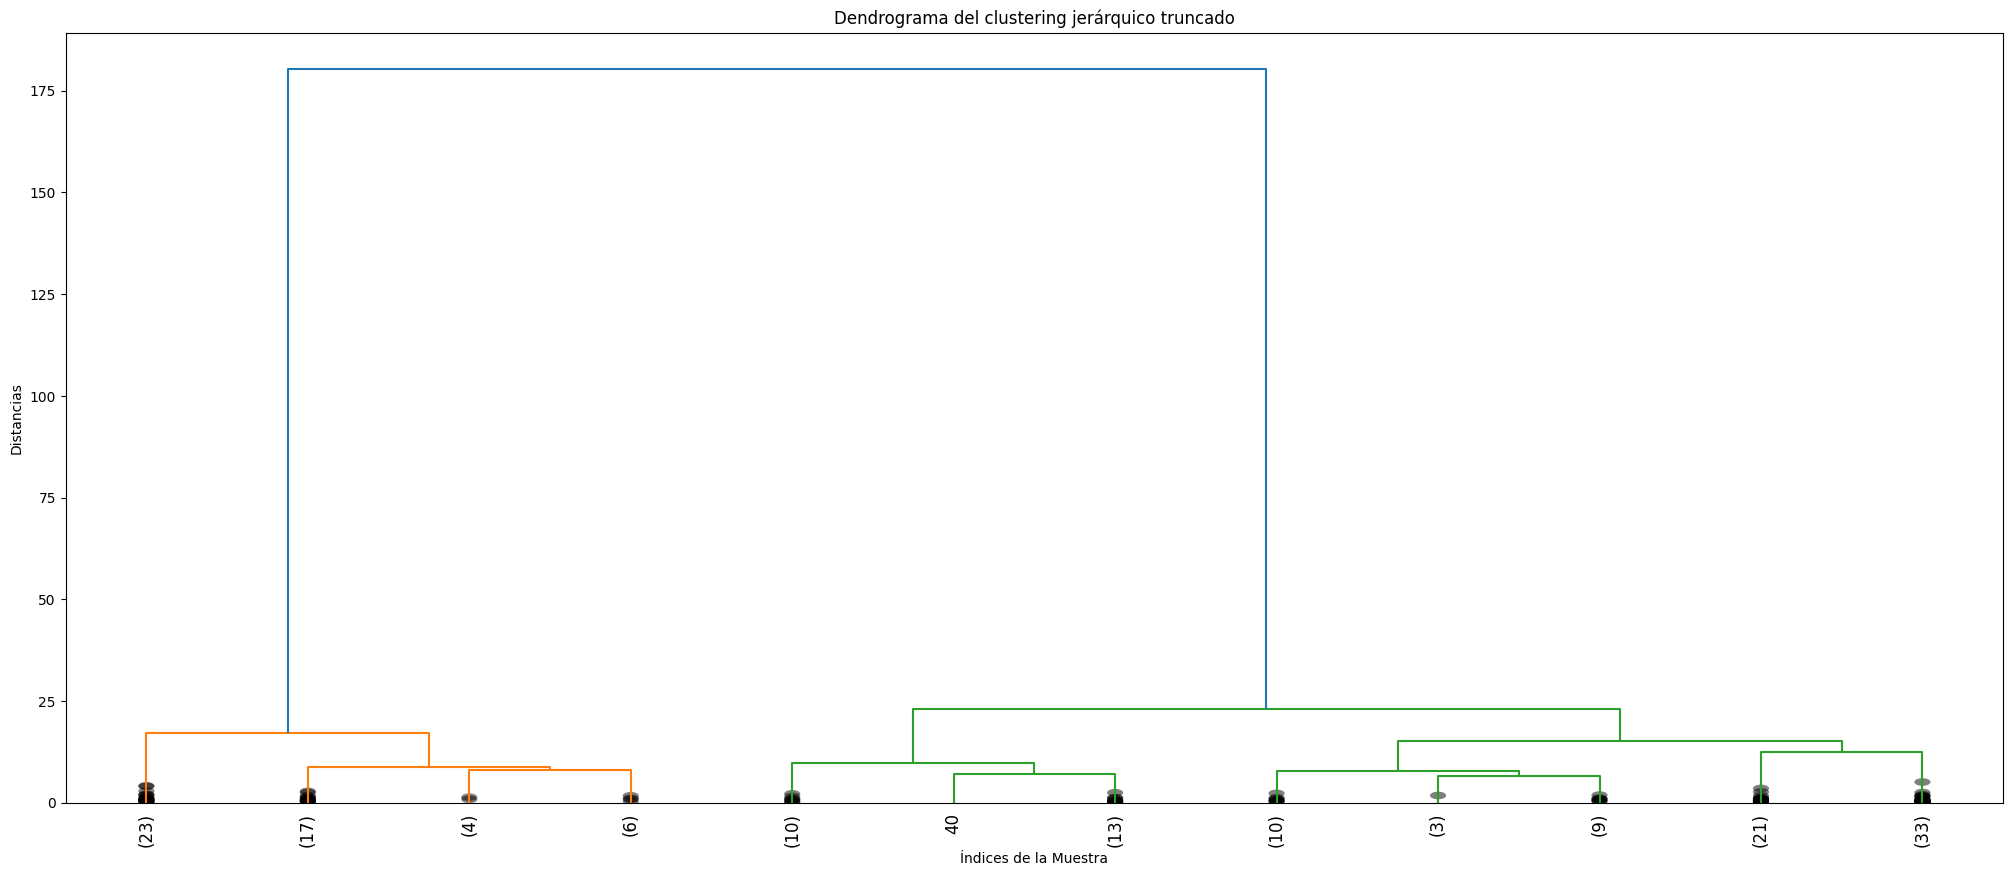

In [60]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()



### Dendrograma tuneado

In [61]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

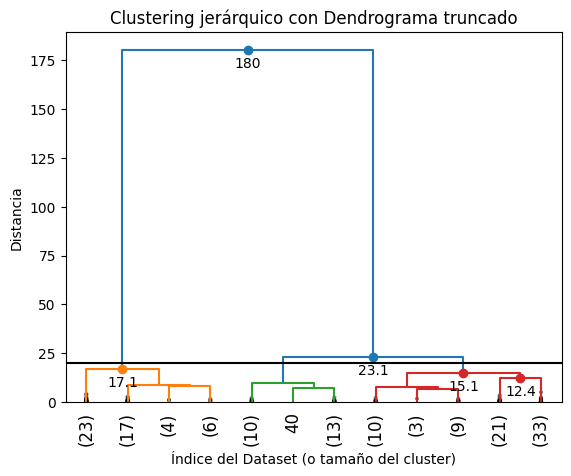

In [62]:
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

In [63]:
# dependiendo de donde esté el corte, tendremos un número de clusters u otro. en el caso de arriba hemos puesto 20.
# no hay una regla de oro para saber dónde cortar
# hay un método (el método de la incosistencia) que usa python.
# la duda es discernir qué distancia entre uniones es la adecuada

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [64]:
from scipy.cluster.hierarchy import inconsistent

In [65]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]


# la primera columna nos da el promedio, la segunda la desviación standard, la tercera el count y la última el factor de inconsitencia
# el valor de la última columna, depende mucho del valor depth que pongamos. de hecho, en este ejemplo, si cambiamos el depth a 5, nos varía mucho, lo cual deja entrever que no es un método muy apropiado para este ejemplo.

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

In [66]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

# pasamos de un factor de inconsistencia de alrededor de 2 a otro de valor alrededor de 5

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

In [ ]:
# existen otros métodos 

### Método del codo

In [ ]:
# este método busca el step del clustering donde la aceleracion del crecimiento de la distancia es mayor

In [67]:
last = Z[-10:]
last

array([[ 40.        , 278.        ,   7.11106083,  14.        ],
       [277.        , 288.        ,   7.86878542,  22.        ],
       [266.        , 280.        ,   8.04935282,  10.        ],
       [285.        , 291.        ,   8.74822275,  27.        ],
       [282.        , 289.        ,   9.84427829,  24.        ],
       [284.        , 286.        ,  12.42734657,  54.        ],
       [290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

In [68]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


Esto es last:
 [  7.11106083   7.86878542   8.04935282   8.74822275   9.84427829
  12.42734657  15.11533118  17.11527362  23.12198936 180.27043021]

Esto es last_rev:
 [180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]

Esto es acc:
 [-5.77157189e-01  5.18302524e-01  3.97185622e-01  1.48701273e+00
  1.04916333e-01 -6.88042176e-01  4.00677330e+00  1.51141725e+02]

Esto es acc_rev:
 [ 1.51141725e+02  4.00677330e+00 -6.88042176e-01  1.04916333e-01
  1.48701273e+00  3.97185622e-01  5.18302524e-01 -5.77157189e-01]



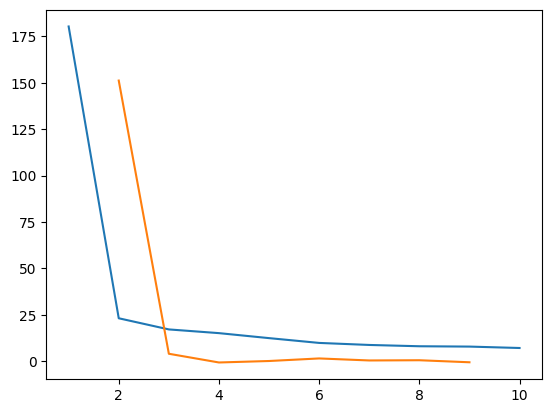

El número óptimo de cluster es 2


In [69]:
last = Z[-10:,2] # me quedo con los últimos diez datos y con la columna 2(la tercera)
print(f"Esto es last:\n {last}\n")
last_rev = last[::-1] # aquí les doy la vuelta simplemente
print(f"Esto es last_rev:\n {last_rev}\n")
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev) # nos da la curva azul

acc = np.diff(last,2)
print(f"Esto es acc:\n {acc}\n")
acc_rev = acc[::-1]
print(f"Esto es acc_rev:\n {acc_rev}\n")
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [ ]:
# este método nos dice que el cluster óptimo es 2. si nos vamos al dendrograma, el 2º cluster por la cola es:

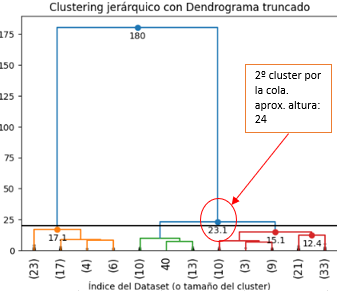

In [ ]:
# vemos que la línea naranja toma su máximo, el salto más grande, el incremento, la aceleración más elevada, en el cluster nº 2

In [ ]:
# el PROBLEMA del Método del Codo es que se necesitan al menos un punto a la derecha y otro a la izquierda del dataset, lo que implica que siempre se necesitaran al menos 2 cluster y nunca nunca la conclusión podrá ser que toda la información debe estar dentro de un, y solo un, cluster.
# lo vemos porque se ha representado solo desde k=2 hasta k=9, por eso nunca la solución va a ser k=1 o k=10.
# ¿todos los datos pueden vivir dentro del mismo cluster? pues con este método no.
# otro problema es que al hacer el numpy.diff de 2 en 2, el orden de las distancias de los últimos elementos no tienen porqué reflejar el orden de las uniones de alguna de las ramas del árbol. ya que podría ser que el salto más grande estuviera al principio o al final.
# la solución a este problema no es pintar todos los puntos, ya que podría haber muchos puntos y muchos clusters.
# vemos un ejemplo de este problema:
# hacemos tres distribuciones multivariantes y con restos por la pantalla:

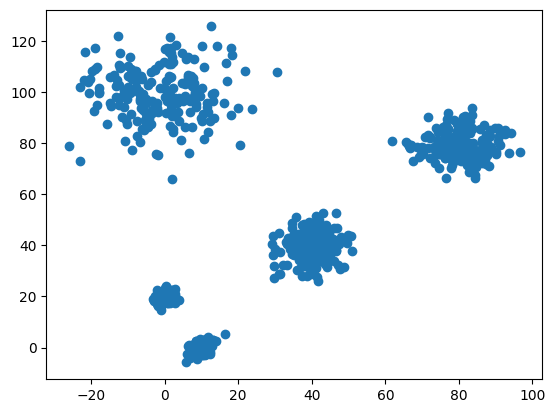

In [70]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [ ]:
# los dos de abajo son los primeros que hemos creado
# c= el del centro
# d= derecha del todo
# e= arriba a la izq

In [ ]:
# ahora hay 5 clusters
# hacemos un dendrograma:

In [71]:
Z2 = linkage(X2, "ward")

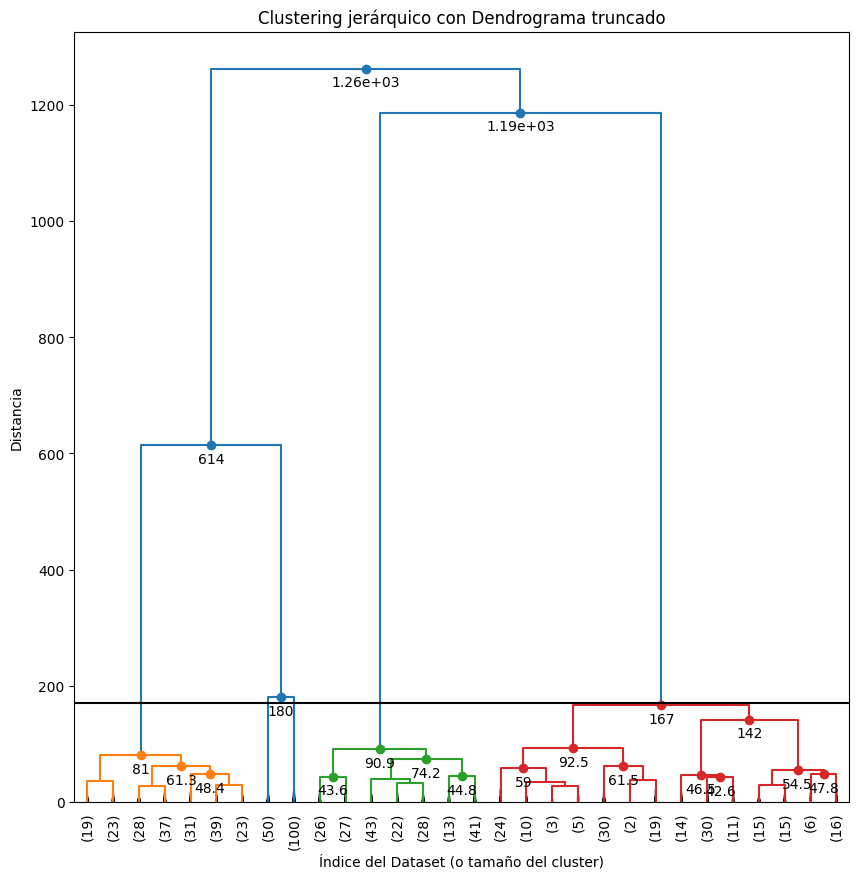

In [72]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size = 10,
    show_contracted = True,
    annotate_above = 40,
    max_d = 170
)
plt.show()

In [ ]:
# aplico el método del codo:

Esto es last:
 [  74.17015312   80.96733501   90.91214341   92.54599212  141.92437181
  166.66434658  180.27043021  614.06504667 1186.7588235  1262.52130994]

Esto es last_rev:
 [1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]

Esto es acc:
 [   3.14762651   -8.31095969   47.74453098  -24.63840492  -11.13389114
  420.18853283  138.89916037 -496.93129039]

Esto es acc_rev:
 [-496.93129039  138.89916037  420.18853283  -11.13389114  -24.63840492
   47.74453098   -8.31095969    3.14762651]



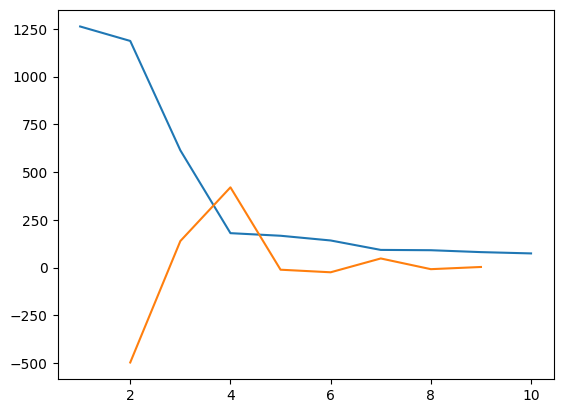

El número óptimo de cluster es 4


In [73]:
last = Z2[-10:,2] # me quedo con los últimos diez datos y con la columna 2(la tercera)
print(f"Esto es last:\n {last}\n")
last_rev = last[::-1] # aquí les doy la vuelta simplemente
print(f"Esto es last_rev:\n {last_rev}\n")
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev) # nos da la curva azul

acc = np.diff(last,2)
print(f"Esto es acc:\n {acc}\n")
acc_rev = acc[::-1]
print(f"Esto es acc_rev:\n {acc_rev}\n")
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [ ]:
# observamos que last_rev nos da los puntos de unión de los cluster


In [ ]:
# vamos a ver la incosistencia:

In [74]:
print(inconsistent(Z2, 5)[-10:]) # 5 niveles por debajo e imprimimos los últimos diez valores

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


In [ ]:
# observamos que tampoco hay mucha diferencia entre 5.22 y 5.13
# concluimos con lo siguiente:
# el método del codo nos dice que hay que cortar en 4 clusters, es decir, entre 180 y 621, sin embargo, vemos claramente, cuando hacemos el primer scatter, que hay 5 grupos bien diferenciados, lo cual nos dice que este método puede no haber sido el correcto

In [76]:
c, coph_dist = cophenet(Z2, pdist(X2))
c

0.8763414276707342

## Recuperar los clusters y sus elementos

In [ ]:
# hemos visto que hay varias maneras de ver con cuántos clusters quedarnos

In [77]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
# para el primer ejemplo (el Z de 150 elementos)

In [78]:
# de esta manera calculo los clusters diciendo nosotros la distancia. establezco 25 que era la altura por la que había que cortar para que hubiera 2 clusters
max_d=25
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [79]:
# hago lo mismo que arriba pero definiendo directamente yo el número de clusters k
k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [85]:
# y tercera manera:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

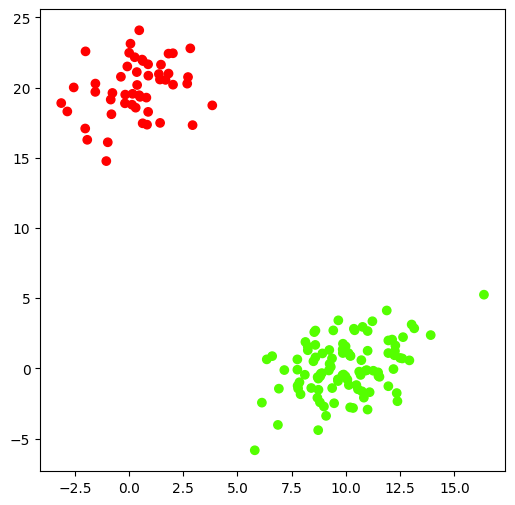

In [84]:
# ahora represento gráficamente cada cluster con distintos colores
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

In [87]:
# ahora lo saco pero para el segundo ejemplo donde había 5 grupos:

# lo hago con el método de la altura:
max_d=170 # cojo 170...ya que aunque el ideal de clusters dijimos más arriba que era 4...en realidad hemos terminado viendo que lo ideal eran 5 porque visualmente se ve que hay 5 grupos
clusters = fcluster(Z2, max_d, criterion="distance")
clusters


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

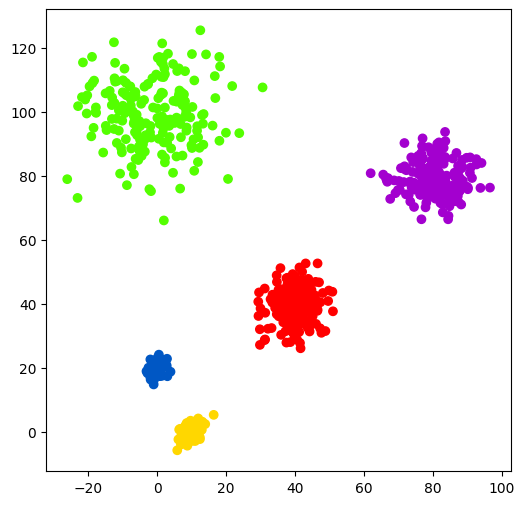

In [88]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()

In [89]:
# si cortara en 190, nos quedarían 4 clusters
max_d=190
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

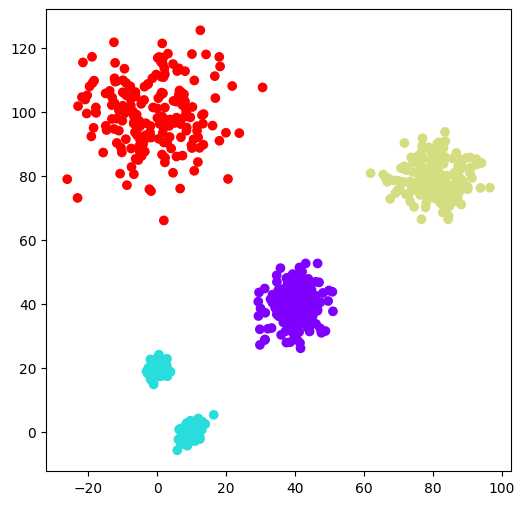

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="rainbow")
plt.show()

In [ ]:
# esto no es el resultado óptimo. el ideal es el de cluster 5